In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\parin\Downloads\build_pipeline\Weather.csv")
df.head()

,Unnamed: 0,temperature_2m,rain,snowfall,wind_speed_10m,year,month,day,time
0,0,4.715,0.3,0.0,23.469128,2013,1,1,00:00:00
1,1,4.715,0.4,0.0,22.476227,2013,1,1,01:00:00
2,2,4.665,0.3,0.0,22.596990,2013,1,1,02:00:00
3,3,4.665,0.2,0.0,24.269980,2013,1,1,03:00:00
4,4,4.715,0.0,0.0,24.962307,2013,1,1,04:00:00


In [2]:
df.describe()

,Unnamed: 0,temperature_2m,rain,snowfall,wind_speed_10m,year,month,day
count,95664.000000,95664.000000,95664.000000,95664.000000,95664.000000,95664.000000,95664.000000,95664.000000
mean,47831.500000,7.763452,0.059525,0.007619,13.030269,2017.961114,6.481184,15.725038
std,27615.962413,7.860811,0.276450,0.060871,5.583718,3.143075,3.427757,8.797919
min,0.000000,-18.435000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,23915.750000,1.665000,0.000000,0.000000,9.164103,2015.000000,4.000000,8.000000
50%,47831.500000,7.215000,0.000000,0.000000,12.413477,2018.000000,6.500000,16.000000
75%,71747.250000,14.065000,0.000000,0.000000,16.343367,2021.000000,9.000000,23.000000
max,95663.000000,31.415000,11.100000,2.800000,40.430737,2023.000000,12.000000,31.000000


In [3]:
# calculate the average snowfall in December for each year

december_data = df[df['month'] == 12]

average_snowfall_by_year = december_data.groupby('year')['snowfall'].mean()

print(average_snowfall_by_year)

year
2013    0.008185
2014    0.010349
2015    0.003763
2016    0.007903
2017    0.014772
2018    0.011855
2019    0.006680
2020    0.004704
2021    0.015148
2022    0.012513
Name: snowfall, dtype: float64


In [4]:
# Calculate average wind speed for each year on the windiest day

average_wind_speed_per_day = df.groupby(['year', 'month', 'day'])['wind_speed_10m'].mean().reset_index()
windiest_days = average_wind_speed_per_day.loc[average_wind_speed_per_day.groupby('year')['wind_speed_10m'].idxmax()]
windiest_days = windiest_days.rename(columns={'wind_speed_10m': 'average_wind_speed'})
print(windiest_days[['year', 'month', 'day', 'average_wind_speed']])


      year  month  day  average_wind_speed
334   2013     12    1           27.500845
708   2014     12   10           28.554111
1069  2015     12    6           31.179337
1426  2016     11   27           28.476979
1471  2017      1   11           29.768840
1841  2018      1   16           29.230190
2192  2019      1    2           27.820644
2608  2020      2   22           28.860682
2991  2021      3   11           25.522053
3306  2022      1   20           29.544099
3931  2023     10    7           27.089005


    year  average_daily_rain
0   2013            0.049703
1   2014            0.054909
2   2015            0.066199
3   2016            0.044740
4   2017            0.061290
5   2018            0.044189
6   2019            0.069258
7   2020            0.066496
8   2021            0.070662
9   2022            0.053916
10  2023            0.074726


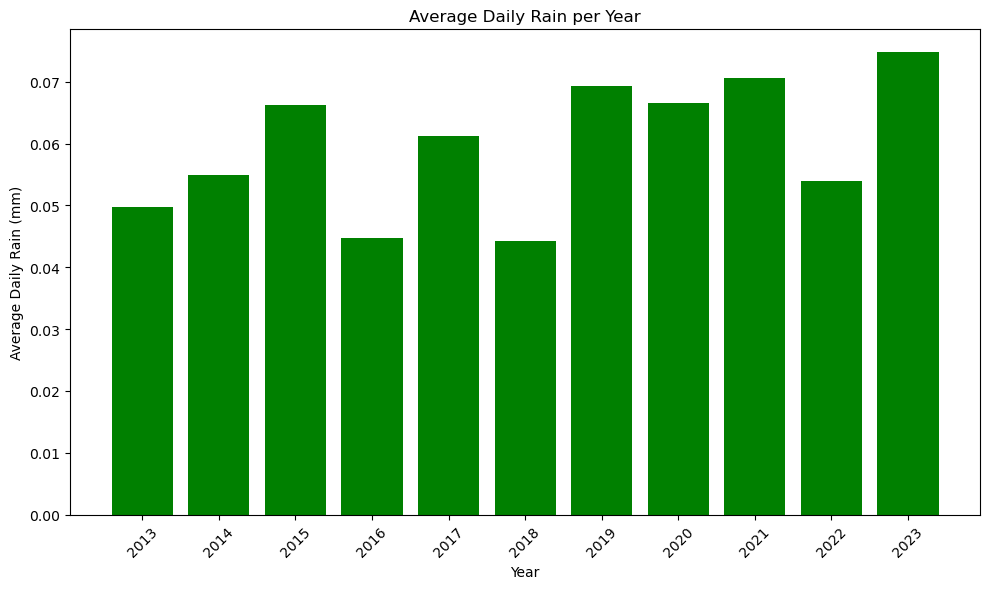

In [5]:
#  Calculate the average daily rain for each year 
average_daily_rain = df.groupby(['year', 'month', 'day'])['rain'].mean().reset_index()
average_yearly_rain = average_daily_rain.groupby('year')['rain'].mean().reset_index()
average_yearly_rain = average_yearly_rain.rename(columns={'rain': 'average_daily_rain'})
print(average_yearly_rain[['year', 'average_daily_rain']])
plt.figure(figsize=(10, 6))
plt.bar(average_yearly_rain['year'].astype(str), average_yearly_rain['average_daily_rain'], color='green')  # Adjust color if needed
plt.title('Average Daily Rain per Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Rain (mm)')
plt.xticks(rotation=45)  
plt.tight_layout()  


       year  month  day  hour  max_rain
1429   2013      3    1    13       0.1
1454   2013      3    2    14       0.1
1464   2013      3    3     0       0.0
1488   2013      3    4     0       0.0
1512   2013      3    5     0       0.0
...     ...    ...  ...   ...       ...
89688  2023      3   27     0       0.0
89712  2023      3   28     0       0.0
89753  2023      3   29    17       0.1
89760  2023      3   30     0       0.0
89784  2023      3   31     0       0.0

[341 rows x 5 columns]


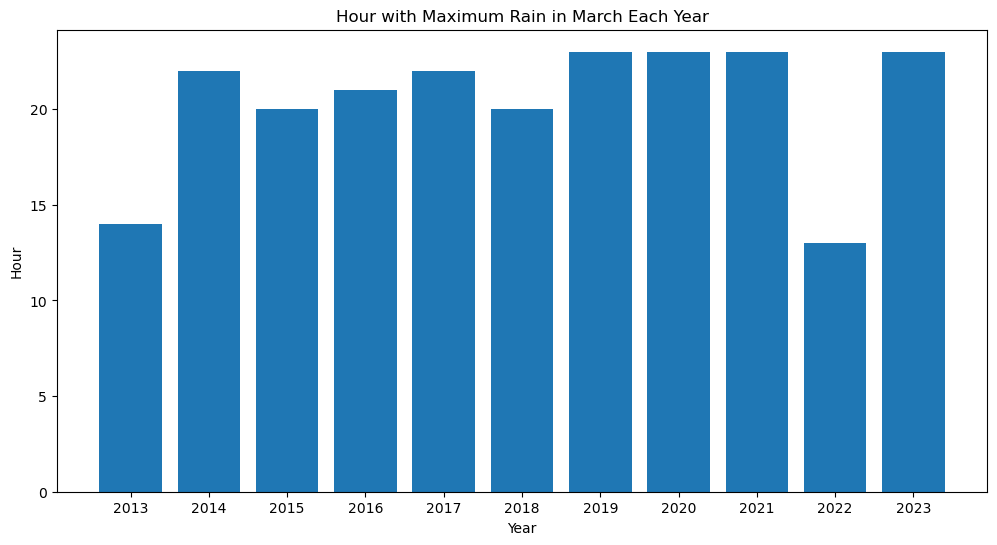

In [6]:
#find which hour in March had the maximum rain each year

df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
march_data = df[df['month'] == 3]

max_rain_hour_per_year = march_data.loc[march_data.groupby(['year', 'month', 'day'])['rain'].idxmax()]
max_rain_hour_per_year = max_rain_hour_per_year.rename(columns={'rain': 'max_rain'})
print(max_rain_hour_per_year[['year', 'month', 'day', 'hour', 'max_rain']])

plt.figure(figsize=(12, 6))
plt.bar(max_rain_hour_per_year['year'].astype(str), max_rain_hour_per_year['hour'])
plt.title('Hour with Maximum Rain in March Each Year')
plt.xlabel('Year')
plt.ylabel('Hour')
plt.show()

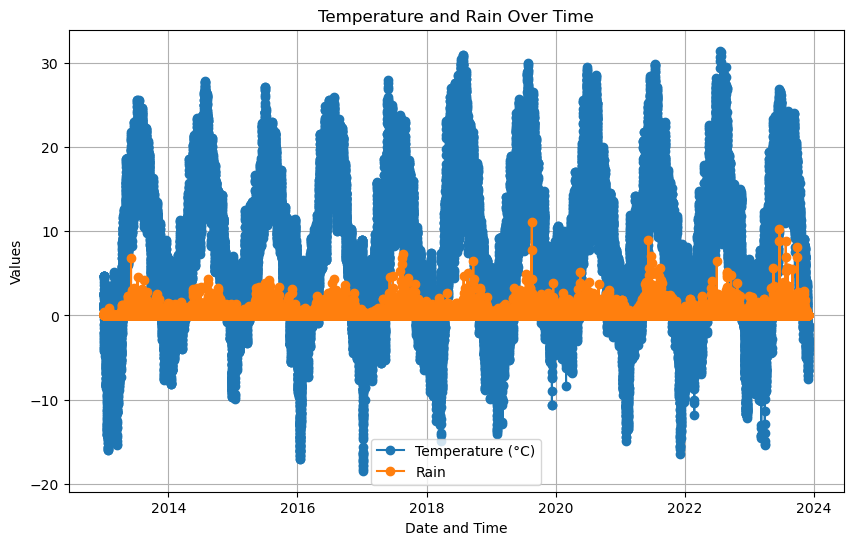

In [7]:
#Skow Temperature and Rain Over Time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temperature_2m'], label='Temperature (°C)', marker='o')
plt.plot(df['datetime'], df['rain'], label='Rain', marker='o')
plt.title('Temperature and Rain Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

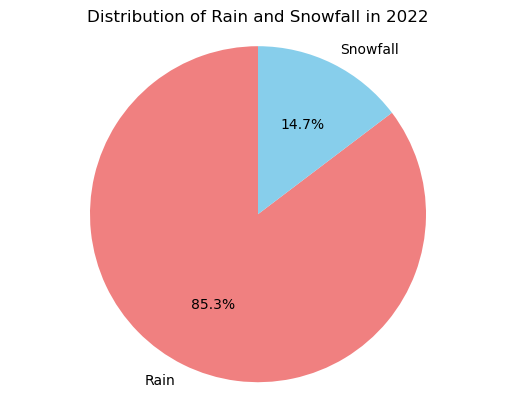

In [8]:
# Show Distribution of Rain and Snowfall in 2022
df_2022 = df[df['year'] == 2022]
rain_sum = df_2022['rain'].sum()
snowfall_sum = df_2022['snowfall'].sum()
colors = ['lightcoral', 'skyblue']
labels = ['Rain', 'Snowfall']
sizes = [rain_sum, snowfall_sum]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  

plt.title(f'Distribution of Rain and Snowfall in 2022')
plt.show()

                     temperature_2m  rain  snowfall  wind_speed_10m
datetime                                                           
2013-07-07 13:00:00          25.565   0.0       0.0       14.277983
2014-07-24 12:00:00          27.865   0.0       0.0        6.638072
2015-07-02 13:00:00          27.165   0.0       0.0       11.457958
2016-07-25 10:00:00          25.865   0.0       0.0       10.239453
2017-05-28 12:00:00          27.915   0.0       0.0       19.995398
2018-07-26 13:00:00          30.965   0.0       0.0        7.594207
2019-07-28 13:00:00          29.915   0.0       0.0       13.441071
2020-06-26 11:00:00          29.465   0.0       0.0        9.511088
2021-07-15 14:00:00          29.865   0.0       0.0       10.495713
2022-07-21 12:00:00          31.415   0.0       0.0       13.202726
2023-06-17 10:00:00          26.865   0.0       0.0       13.708390


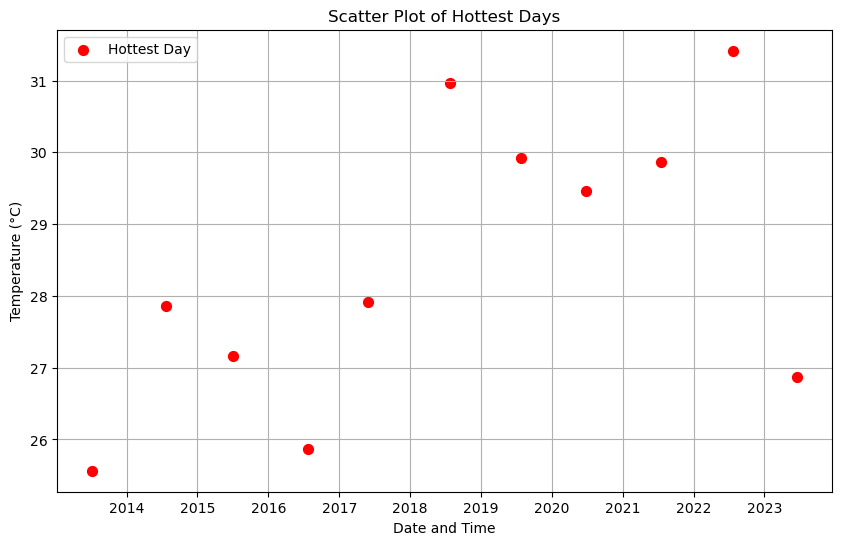

In [9]:
#show the hottest days of each year,
import seaborn as sns
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['time'])
df.set_index('datetime', inplace=True)

# Find the hottest day of each year
hottest_days = df.groupby('year')['temperature_2m'].idxmax()
hottest_days_info = df.loc[hottest_days]

print(hottest_days_info[['temperature_2m', 'rain', 'snowfall', 'wind_speed_10m']])

plt.figure(figsize=(10, 6))
plt.scatter(hottest_days_info.index, hottest_days_info['temperature_2m'], color='red', label='Hottest Day', s=50)

plt.title('Scatter Plot of Hottest Days')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
